In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
housedata=pd.read_csv('housing.csv')
housedata.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7


In [3]:
housedata.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False
505,False,False,False,False,False,False,False,False,False,False,False,False,False,False
506,False,False,False,False,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
housedata.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [5]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [6]:
# Select numerical columns
numerical_cols = housedata.select_dtypes(include=['float64', 'int64']).columns

In [7]:
# Fill missing values in numerical columns with the mean
housedata[numerical_cols] = housedata[numerical_cols].fillna(housedata[numerical_cols].mean())

In [14]:
housedata.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Explore the Data

C:\Users\moizr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


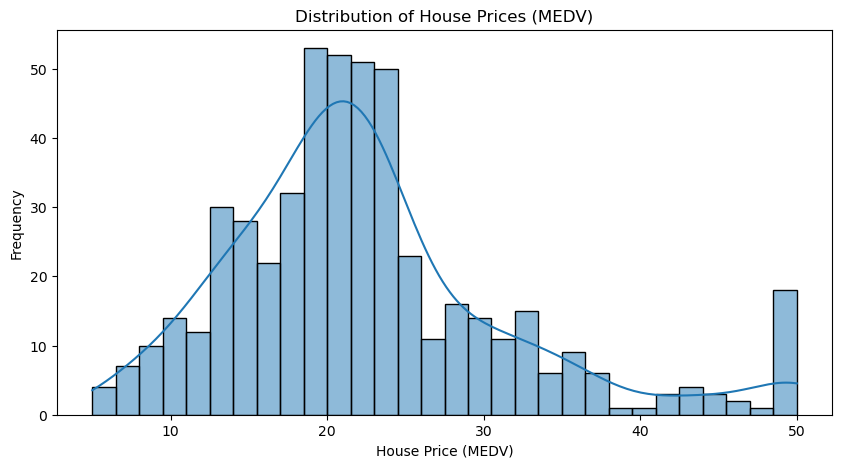

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(housedata['MEDV'], bins=30, kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('House Price (MEDV)')
plt.ylabel('Frequency')
plt.show()


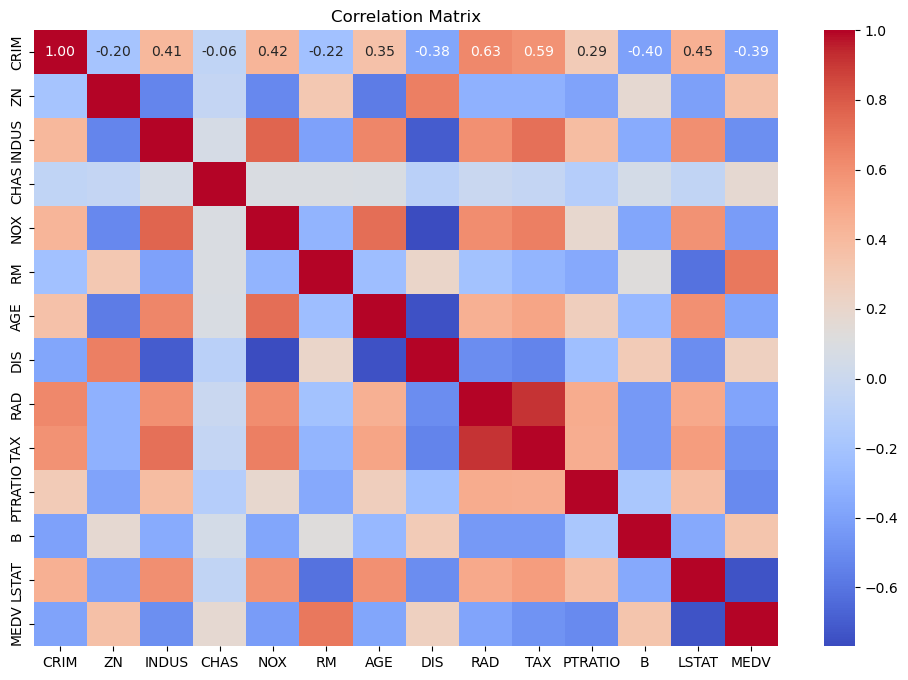

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(housedata.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Preparation

In [10]:
# Selecting features and target variable
X = housedata.drop("MEDV", axis=1)  # Features
y = housedata["MEDV"]  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Linear Regression Model

In [11]:
# Create and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

 ### Evaluate the Model

In [12]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 20.45
R-squared: 0.74


### Visualize the Results

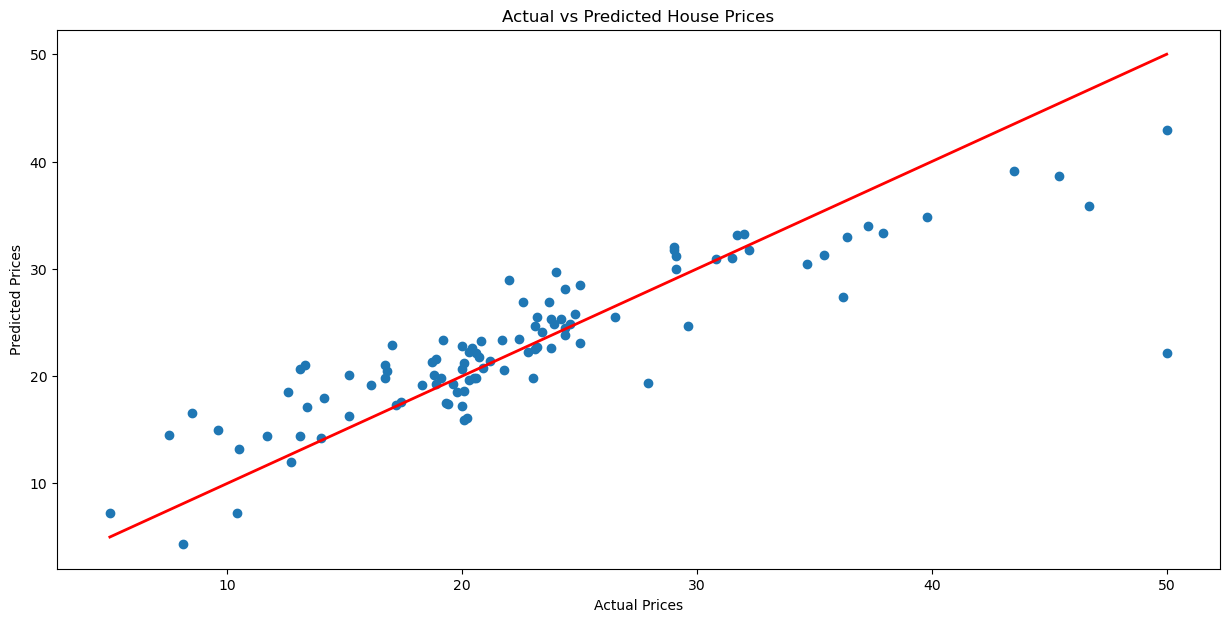

In [16]:
# Visualize Actual vs Predicted prices
plt.figure(figsize=(15, 7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of equality
plt.show()